In [1]:
# Load packages and libraries
import pandas as pd
import numpy as np

## visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import missingno #missing number visualization

In [2]:
# Import dataset
df = pd.read_csv('./Titanic.csv')
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,NaN,S
750,751,1,2,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S
637,638,0,2,"Collyer, Mr. Harvey",male,31.0,1,1,C.A. 31921,26.2500,NaN,S
754,755,1,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.0,1,2,220845,65.0000,NaN,S


In [3]:
df.shape

(891, 12)

The `Titanic.csv` dataset have 12 `features` (i.e. columns) and 891 `entries` (i.e. rows).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Test for missing values.

<Axes: >

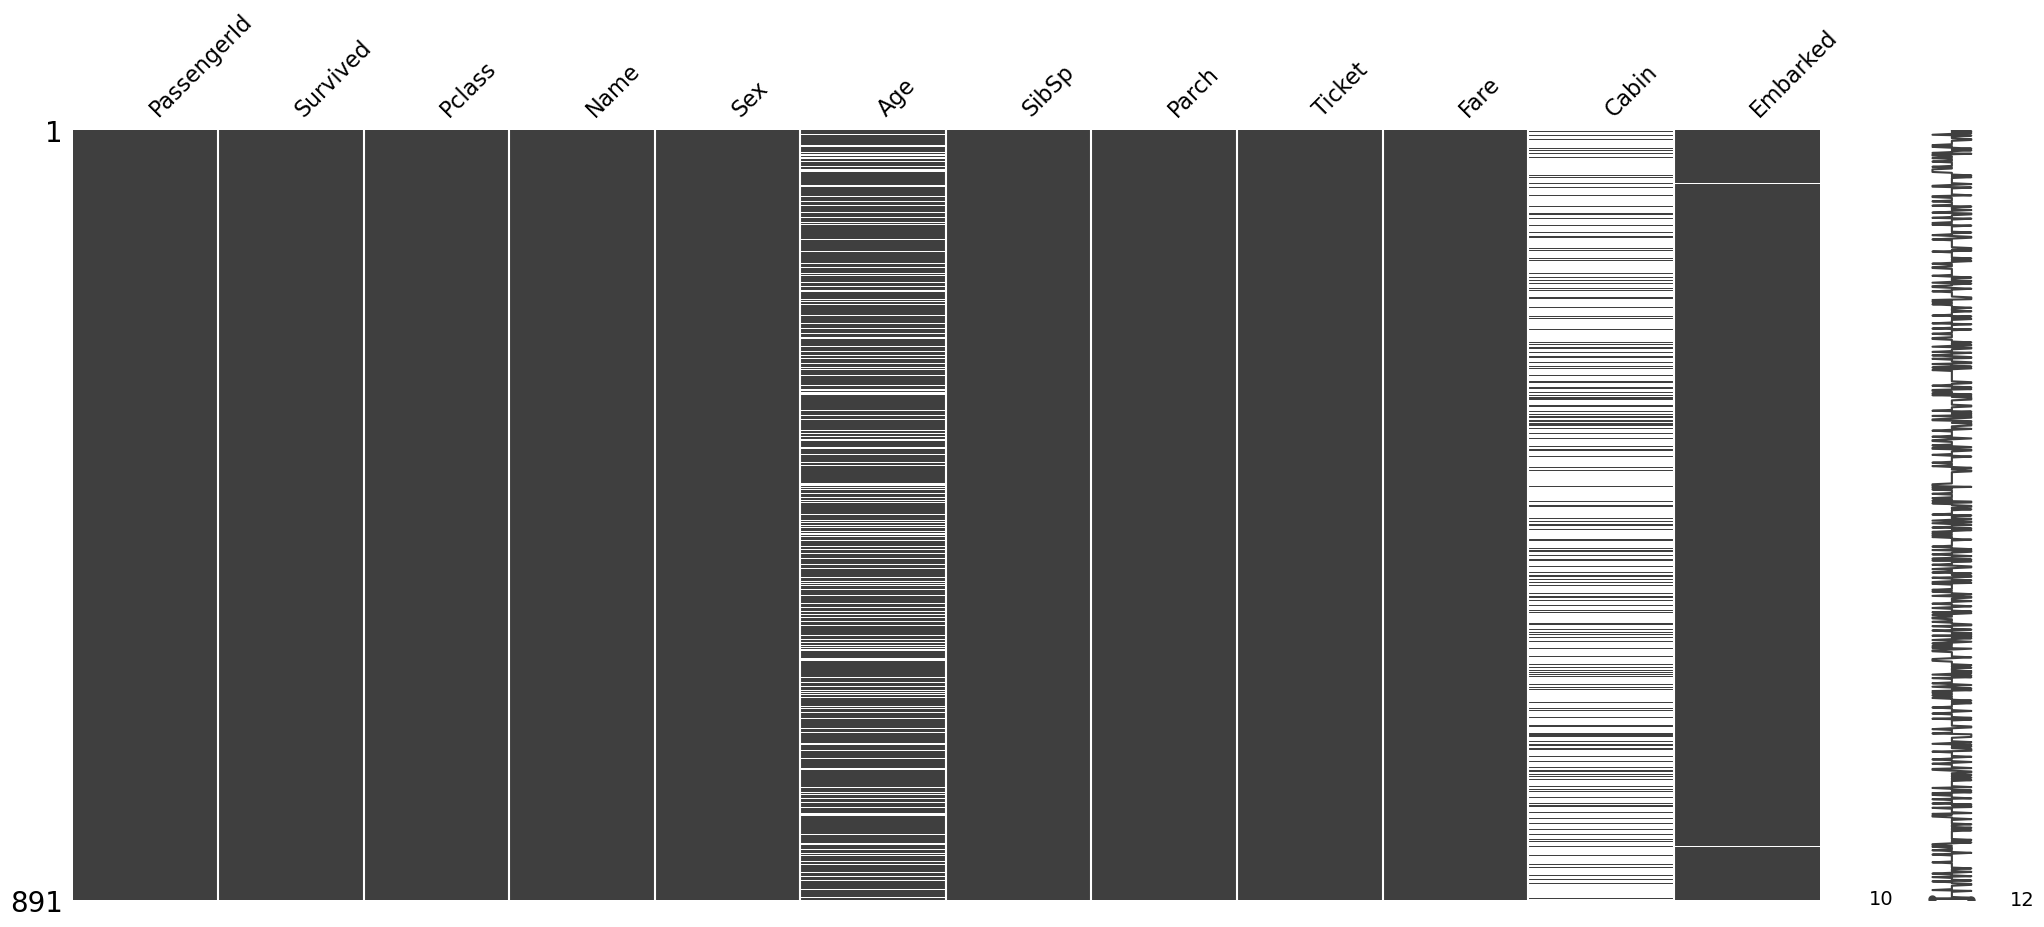

In [5]:
missingno.matrix(df)

From the visualization above, it can be noted that we have a lot missing values in our `Age` and `Cabin` and 2 missing values in the `embark` status.

In [6]:
# missing_count = df.isna().sum()
# missing_count[:]

def missing_count(df):
    for col in df.columns:
        m = df[col].isna().sum()
        print(f"{col} \t:\t {m} \t:\t {(m/df.shape[0])*100 :.2f}")

In [7]:
missing_count(df)

PassengerId 	:	 0 	:	 0.00
Survived 	:	 0 	:	 0.00
Pclass 	:	 0 	:	 0.00
Name 	:	 0 	:	 0.00
Sex 	:	 0 	:	 0.00
Age 	:	 177 	:	 19.87
SibSp 	:	 0 	:	 0.00
Parch 	:	 0 	:	 0.00
Ticket 	:	 0 	:	 0.00
Fare 	:	 0 	:	 0.00
Cabin 	:	 687 	:	 77.10
Embarked 	:	 2 	:	 0.22


**NB:** from above, it can be seen that our Cabin feature have over *77%* of its  value missing. trying to fill up such a significant missing value will add make our data bias, so its best to drop the feature.

Also, there are little to no info required from the passengerID and name variables.

In [8]:
df.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
df[df.isna().any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C
863,0,3,female,NaN,8,2,69.5500,S
868,0,3,male,NaN,0,0,9.5000,S
878,0,3,male,NaN,0,0,7.8958,S


**Filling missing data:**
I'll be filling the missing data with the values recorded before the entry. This will help sample the missing data from the available data.

<Axes: >

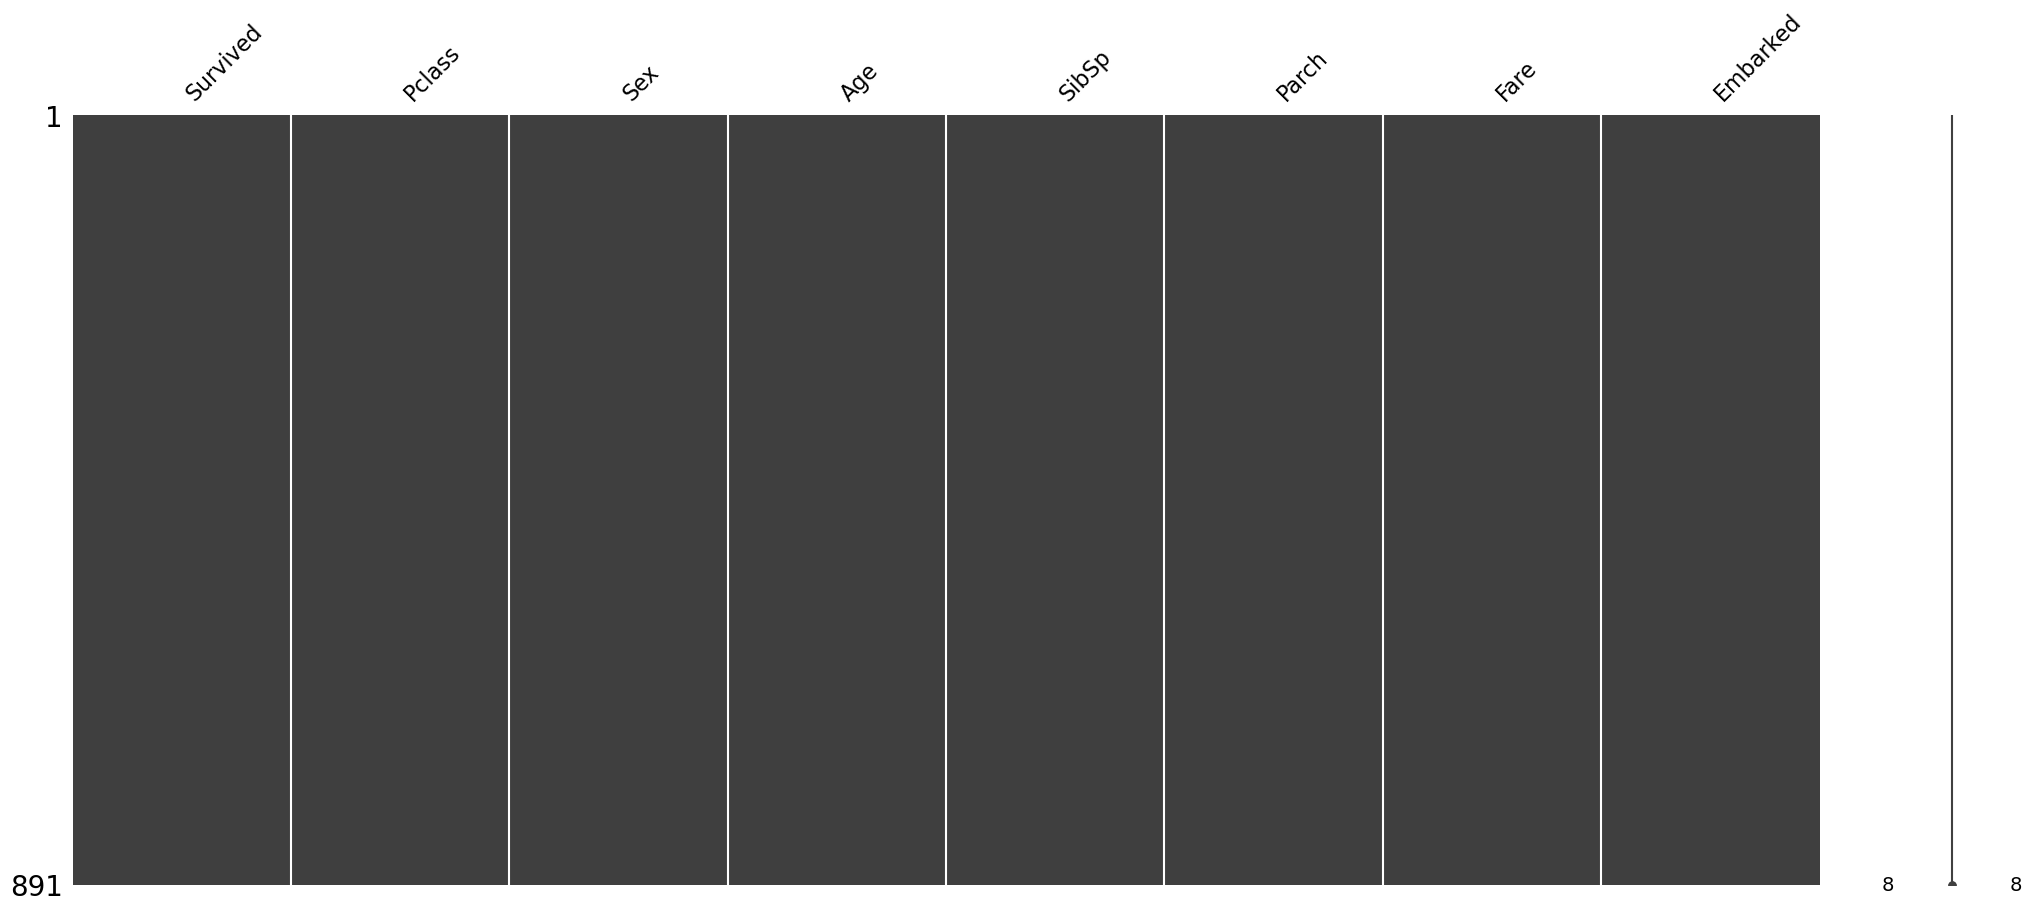

In [10]:
df.ffill(inplace=True)
missingno.matrix(df)

In [11]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.00000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.58156,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.55459,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.42000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.00000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.00000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.00000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.00000,8.000000,6.000000,512.329200


## Exploration by visualization

Sex
male      577
female    314
Name: count, dtype: int64


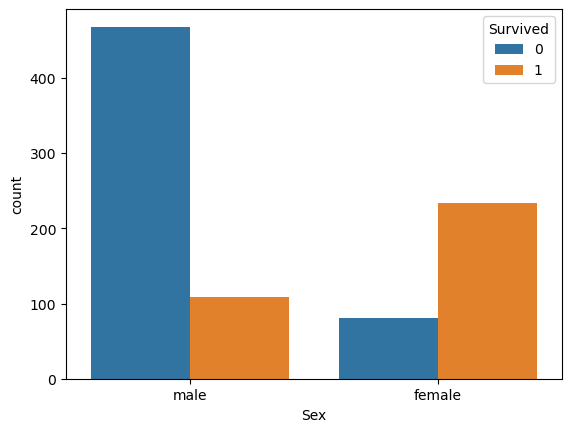

In [12]:
print(df['Sex'].value_counts())
sns.countplot(df, x='Sex', hue='Survived')
plt.show()

The record shows more significant more population of male than female. The ratio of females who survived from the titanic is greater than that of males.

from this we can observe that majority of those who survived are female even when the male population are more. But, this still require more exploration.

### Age group and survival ratio

In [13]:
print('max age: ', df['Age'].max())
print('min age: ', df['Age'].min())

max age:  80.0
min age:  0.42


<Axes: xlabel='Age_group', ylabel='count'>

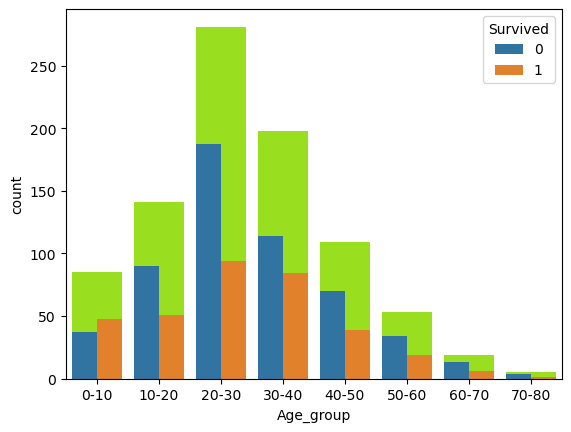

In [14]:
df['Age_group'] = pd.cut(x=df['Age'], bins=8,
                         labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])
sns.countplot(df, x='Age_group', color='#a2ff00')
sns.countplot(df, x='Age_group', hue='Survived')

The majority of the population is between the age of 10 to 60 years. More children within the age of 0-10 years survived than those who don't.

### Class and survivability

Pclass
3    491
1    216
2    184
Name: count, dtype: int64
                 Survived
Pclass Survived          
1      1              136
       0               80
2      0               97
       1               87
3      0              372
       1              119


<Axes: xlabel='Pclass', ylabel='count'>

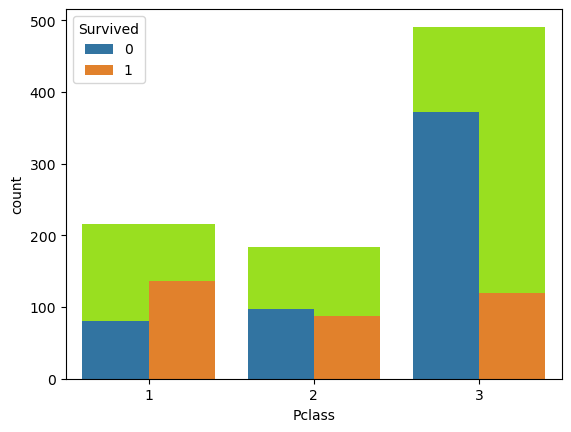

In [15]:
print(df['Pclass'].value_counts())
# df['Pclass'].count
print(df.groupby('Pclass').aggregate({'Survived': 'value_counts'}))
sns.countplot(df, x='Pclass', color='#a2ff00')
sns.countplot(df, x='Pclass', hue='Survived')

In [16]:
result = df.groupby('Pclass')['Survived'].value_counts().unstack(fill_value=0)
result['Percentage_survived'] = round((result[1] / (result[0] + result[1])) * 100, 2)
result

Survived,0,1,Percentage_survived
Pclass,,,
1,80,136,62.96
2,97,87,47.28
3,372,119,24.24


From the visualization and tables above, we can deduce that majority *62.96%* of the first-class passengers survived, as compared to other classes.

<Axes: xlabel='Age_group', ylabel='count'>

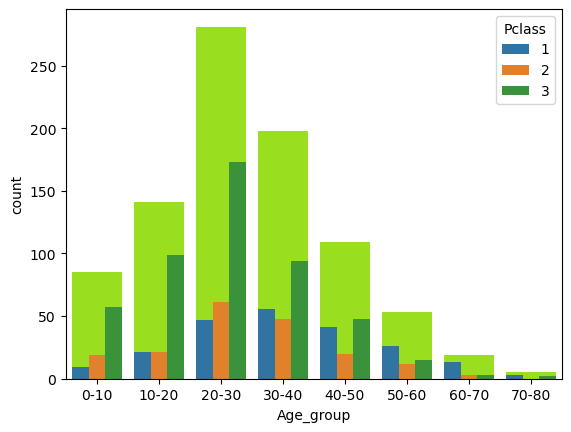

In [17]:
# distribution of class by age.
sns.countplot(df, x='Age_group', color='#a2ff00')
sns.countplot(df, x='Age_group', hue='Pclass')

In [18]:
# fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))

# sns.histplot(data = df[df['Age_group'] == '0-10'], x='Pclass', hue='Survived', ax=ax[0][0])
# ax[0][0].legend(['Survived', 'Did not survive'])
# sns.histplot(data = df[df['Age_group'] == '10-20'], x='Pclass', hue='Survived', ax=ax[0][1])
# ax[0][1].legend(['Survived', 'Did not survive'])

# sns.histplot(data = df[df['Age_group'] == '20-30'], x='Pclass', hue='Survived', ax=ax[1][0])
# ax[1][0].legend(['Survived', 'Did not survive'])
# sns.histplot(data = df[df['Age_group'] == '30-40'], x='Pclass', hue='Survived', ax=ax[1][1])
# ax[1][1].legend(['Survived', 'Did not survive'])

# sns.histplot(data = df[df['Age_group'] == '40-50'], x='Pclass', hue='Survived', ax=ax[2][0])
# ax[2][0].legend(['Survived', 'Did not survive'])
# sns.histplot(data = df[df['Age_group'] == '50-60'], x='Pclass', hue='Survived', ax=ax[2][1])
# ax[2][1].legend(['Survived', 'Did not survive'])

# sns.histplot(data = df[df['Age_group'] == '60-70'], x='Pclass', hue='Survived', ax=ax[3][0])
# ax[3][0].legend(['Survived', 'Did not survive'])
# sns.histplot(data = df[df['Age_group'] == '70-80'], x='Pclass', hue='Survived', ax=ax[3][1])
# ax[3][1].legend(['Survived', 'Did not survive'])

### Embarked and survivability.

In [19]:
df['Embarked'].value_counts()

Embarked
S    644
C    169
Q     78
Name: count, dtype: int64

<Axes: xlabel='Embarked', ylabel='Count'>

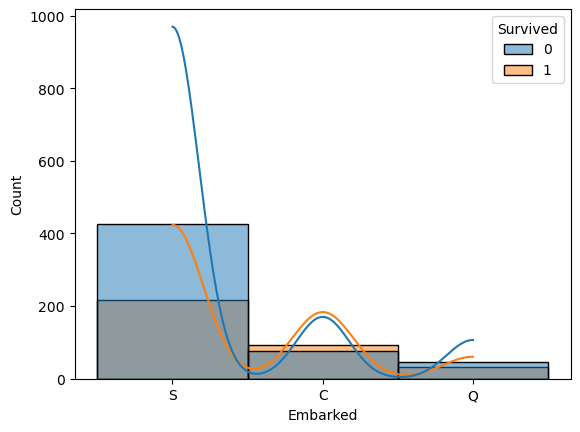

In [20]:
sns.histplot(df, x='Embarked', hue='Survived', kde=True)

The probability of surviving for a passenger who embarked in at port S is drastically low. as compared to port C where slightly more of its passengers have a probabilty of surviving. from here, we can infere that a person is more likely to survivew if they embarked at port C.

## Bivariate analysis

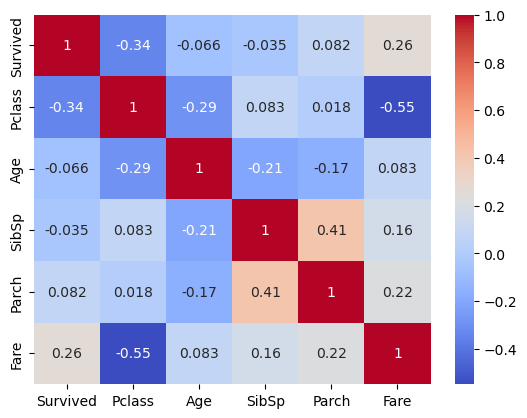

In [21]:
corr = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Assuming a threshold of `0.7` for our correlation, we can see that there are very low correlation amongst the numerical variables. The highest correlation is between `Pclass` and `Fare`, the higher a persons fare, the lower there passenger class identifier.

<Axes: >

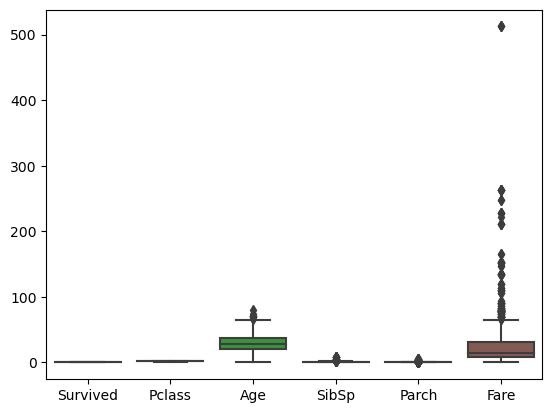

In [22]:
sns.boxplot(data=df)

From the boxplot, some extreme datapoints can be see not conforming? To distribution. Could this extreme points in fare be from higher ticket prices for pclass? if so, did they survive?

From our descriptive statistics above, the mean fare is *32.20*, median = 14.45, and max of 512.329. What is the was the fate of our top 25%?

<Axes: xlabel='Fare', ylabel='Count'>

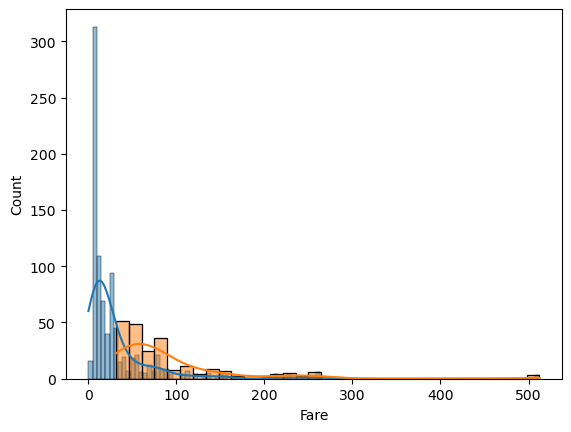

In [23]:
sns.histplot(df, x='Fare', kde=True)
sns.histplot(df[df['Fare'] > 31.00], x='Fare', kde=True) # Fares greater than the 3rd quartile (75th percentile). Top 25%

Our feature fare is highly positively skewed, as expected from the descriptive statistics.


Text(0.5, 1.0, 'Distribution of bottom 25% Fare')

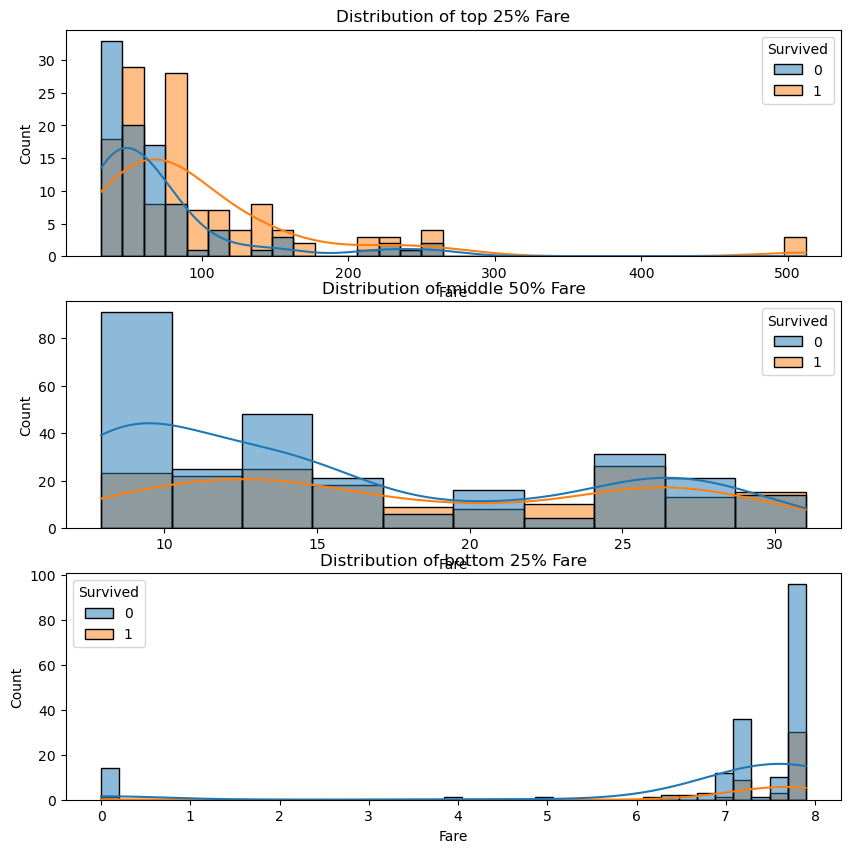

In [24]:
# plt.figure(figsize=(45, 20))
fig, ax = plt.subplots(nrows=3, figsize=(10, 10)) #, figsize=(10, 10)
sns.histplot(df[df['Fare'] > 31.00], x='Fare', kde=True, hue='Survived', ax=ax[0])
ax[0].set_title('Distribution of top 25% Fare')
sns.histplot(df[(df['Fare'] > 7.91) & (df['Fare'] <=31.00)], x='Fare', kde=True, hue='Survived', ax=ax[1])
ax[1].set_title('Distribution of middle 50% Fare')
sns.histplot(df[df['Fare'] <= 7.91], x='Fare', kde=True, hue='Survived', ax=ax[2])
ax[2].set_title('Distribution of bottom 25% Fare')

### survivors by sex and class

<Axes: xlabel='Pclass', ylabel='Age'>

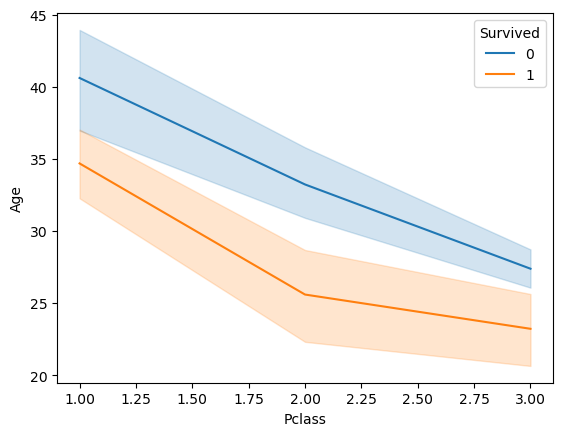

In [25]:
sns.lineplot(df, y='Age', x='Pclass', hue='Survived')

# Report

From the exploratory data analysis, the following were noted:

<ul> 
    <li> There are some level of preference given to women and children. </li>
    <li> There are preference for the safety of the higher class. </li>
    <li> People who embarked at port C are more likely to survive than those from port S. </li>
    <li> The higher the price, the higher the passenger class. </li>
</ul>